У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [162]:
import pandas as pd
from matplotlib import pyplot as plt
data_path = 'data/yulu_rental.csv'
df = pd.read_csv(data_path)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

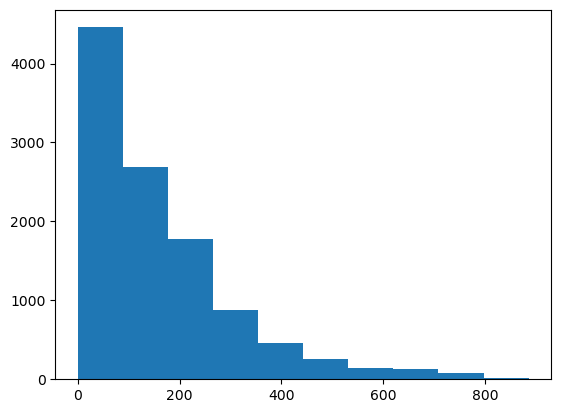

In [164]:
plt.hist(df['registered'])
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

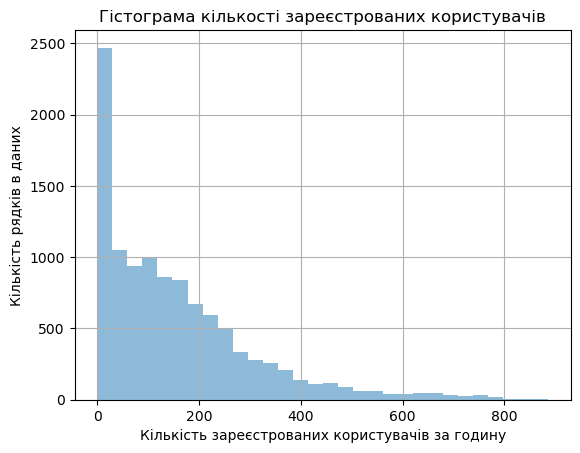

In [166]:
plt.hist(df['registered'], bins=30, alpha=.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.grid(axis='both')

Кількість рядків поступово зменьшуються, найбільша кількість рядків припадає на діапазон від 0 до 200 зареєстрованих користувачів за годину. Для більшості годин маємо невелику активність реєстрації користувачів, є години, коли маємо більшу кількість реєстрацій, можливо це може бути пов'язано з ранковим або вечірніми годинами, акціями або рекламними компаніями.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [220]:
df['datetime'] = pd.to_datetime(df.datetime)
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [224]:
df['dayofweek'] = df.datetime.dt.day_of_week
df['dayofweek'] 

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int32

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [226]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

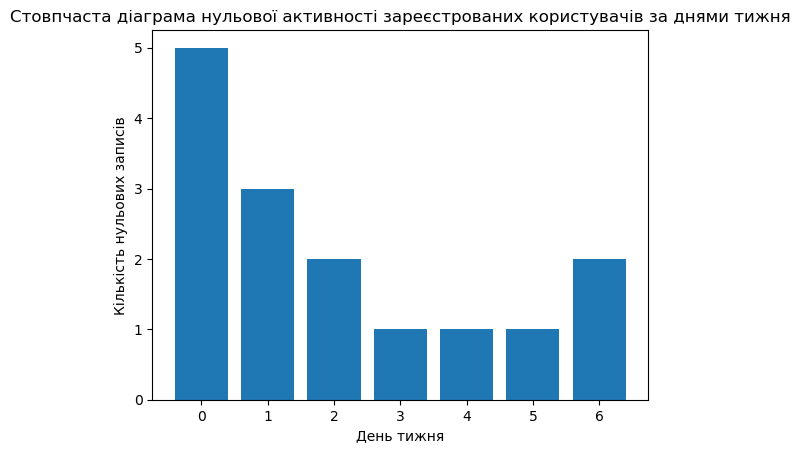

In [254]:
# df.query('registered == 0')['dayofweek'].value_counts(normalize=False)
df_filtered_non_registered = df[df['registered'] == 0]
df_filtered_non_registered_counts = df_filtered_non_registered.groupby('dayofweek')['registered'].count().reset_index()
plt.bar(df_filtered_non_registered_counts['dayofweek'], df_filtered_non_registered_counts['registered'])
plt.title('Стовпчаста діаграма нульової активності зареєстрованих користувачів за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість нульових записів')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

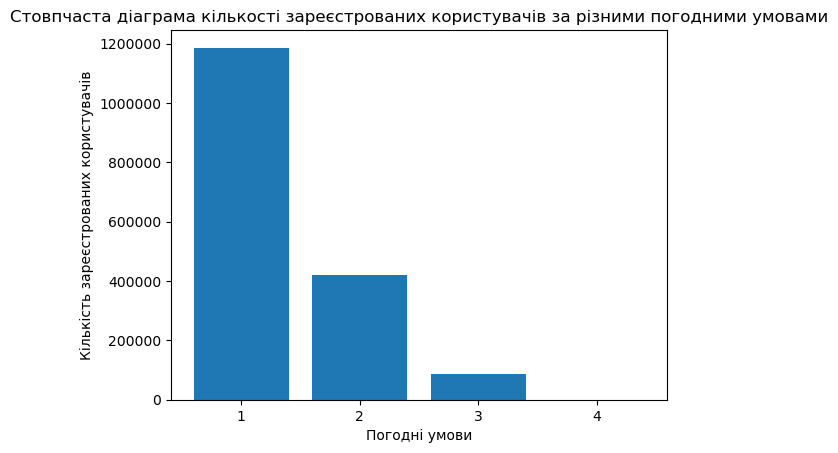

In [276]:
df_registered_sum_by_weather = df.groupby('weather')['registered'].sum().reset_index()
plt.bar(df_registered_sum_by_weather['weather'], df_registered_sum_by_weather['registered'])
plt.xticks(ticks=df_registered_sum_by_weather['weather'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Стовпчаста діаграма кількості зареєстрованих користувачів за різними погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.show()

Візуалізація має логічний сенс з точки зору опису даних, тому що показує нам як погодні умови впливають на кількість зареєстрованих користувачів. Наприклад, ми можемо зробити висновок, що при погодних умовах 4 (Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман) найменьша кількість зареєстрованих користувачів, а при погодних умовах 1 (Ясно, Мало хмарно, частково хмарно) найбільша, тобто погодні умови дійсно мають впливають на реєстрацію користувачів.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

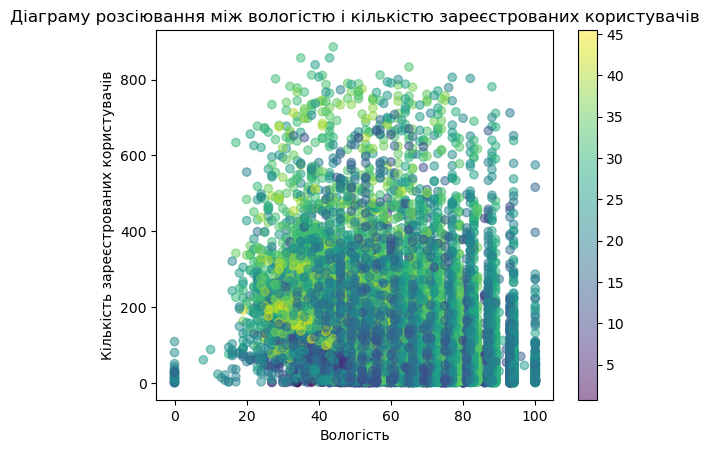

In [281]:
plt.scatter(df['humidity'], df['registered'], alpha=0.5, c=df['atemp'])
plt.title('Діаграму розсіювання між вологістю і кількістю зареєстрованих користувачів')
plt.xlabel('Вологість')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.colorbar();

Ми бачимо залежність між вологістю та кількістю зареєстрованих користувачів та температцрою по відчуттям. 
На графіку ми можемо побачити, що точки с більш світлим кольором відповідають більшій кількості зареєстрованих користучачів для більшої температури повітря за відчуттям. Та навпаки для меньшої тем-ри за відчуттям відповідає меньша кількість реєстрацій.
Також ми можемо побачити залежність між вологістю та кількістю реєстрацій, тобто для значень вологості від 20 до приблизно 80-90 маємо більшу кількість реєстрацій.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)